# Momentum effect: Is there an advantage to investing when a stock's acceleration is high and positive?

Momentum indicators:
1. Relative strength index (RSI) https://www.investopedia.com/terms/r/rsi.asp
2. MACD (Moving Average Convergence Divergence)https://www.investopedia.com/terms/m/macd.asp#:~:text=MACD%20is%20calculated%20by%20subtracting,an%20exponentially%20weighted%20moving%20average.
3. Price Rate of Change 
4. More indicators as desired

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_RSI(data, window):
    delta = data.diff()   
    gains, losses = delta.copy(), delta.copy()
    gains[gains < 0] = 0 # makes sure gains only contain postive values
    losses[losses > 0] = 0 # makes sure losses only contain negative values
    avg_gain = pd.Series(gains).rolling(window).mean() # calculates the rolling mean over window amount of time points
    avg_loss = pd.Series(losses).rolling(window).mean().abs()
    RSI = 100 - (100/(1+(avg_gain/avg_loss)))
    return RSI

#Strategy: if RSI < 30 the stock is oversold/undervalued, if RSI>70 the stock is overbought/overvalued
def stock_signal(rsi_series):
    latest_rsi = rsi_series.iloc[-1]  # most recent rsi value
    if latest_rsi < 30:
        return 1  # buy
    elif latest_rsi > 70:
        return -1  # sell
    else:
        return 0  # hold
    
#percent rate of change
def calculate_ROC(data,window):
    return data.pct_change(window)

In [2]:
tickers = ['GOOG', 'TSLA', 'META', 'NVDA', 'AAPL', 'EBAY', 'AMZN', 'NFLX', 'MSFT', 'INTC']
start_date = '2023-11-01'
end_date = '2023-12-30'

stock_data = {}
rsi_values = {}
roc_values = {}
signals = {}

for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, start=start_date, end=end_date)
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14)
    roc_values[stock_symbol] = (calculate_ROC(stock_data[stock_symbol]['Adj Close'], window = 14)*100)
    signals[stock_symbol] = stock_signal(rsi_values[stock_symbol])
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")
    print(f"Rate of change of {stock_symbol}: {roc_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    79.784396
2023-11-22    80.200671
2023-11-24    70.712441
2023-11-27    68.292679
2023-11-28    67.610425
2023-11-29    58.254456
2023-11-30    55.594570
2023-12-01    47.962577
2023-12-04    42.633390
2023-12-05    42.549020
2023-12-06    37.873540
2023-12-07    49.502203
2023-12-08    49.403800
2023-12-11    43.836155
2023-12-12    40.596703
2023-12-13    38.095227
2023-12-14    39.704678
2023-12-15    41.529176
2023-12-18    47.412233
2023-12-19    53.229523
2023-12-20    61.299206
2023-12-21    65.738644
2023-12-22    74.016655
2023-12-26    72.182037
2023-12-27    70.915196
2023-12-28    58.289393
2023-12-29    63.74120

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AAPL: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    84.409977
2023-11-22    82.301548
2023-11-24    80.729535
2023-11-27    77.463914
2023-11-28    74.944126
2023-11-29    69.050098
2023-11-30    71.927853
2023-12-01    66.351398
2023-12-04    65.422966
2023-12-05    68.276233
2023-12-06    62.759069
2023-12-07    63.302186
2023-12-08    66.217676
2023-12-11    54.474916
2023-12-12    60.149628
2023-12-13    64.692872
2023-12-14    68.983178
2023-12-15    67.844050
2023-12-18    62.002605
2023-12-19    66.535599
2023-12-20    59.991817
2023-12-21    57.388250
2023-12-22    59.246155
2023-12-26    49.031937
2023-12-27    52.291487
2023-12-28    47.920398
2023-12-29    40.18518

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of MSFT: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    73.061569
2023-11-22    74.152361
2023-11-24    71.646303
2023-11-27    70.359044
2023-11-28    70.410865
2023-11-29    64.302286
2023-11-30    67.278521
2023-12-01    55.558047
2023-12-04    53.040827
2023-12-05    52.859323
2023-12-06    49.223638
2023-12-07    44.949682
2023-12-08    54.502474
2023-12-11    43.019532
2023-12-12    51.534293
2023-12-13    45.411361
2023-12-14    37.483699
2023-12-15    42.050067
2023-12-18    39.396464
2023-12-19    43.669260
2023-12-20    41.129891
2023-12-21    48.928148
2023-12-22    56.647138
2023-12-26    52.844271
2023-12-27    57.639878
2023-12-28    56.452987
2023-12-29    52.91648

In [3]:
stock_data['GOOG'].head() # the dataframe from yfinance

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,125.339996,127.739998,124.925003,127.570000,127.424995,26536600
2023-11-02,129.559998,130.089996,128.110001,128.580002,128.433853,24091700
2023-11-03,129.089996,130.729996,129.009995,130.369995,130.221802,19517900
2023-11-06,130.220001,131.559998,129.929993,131.449997,131.300583,15360400
2023-11-07,131.979996,133.279999,131.139999,132.399994,132.249496,19223800


In [4]:
initial_investment_per_stock = {}
for ticker in tickers:
    investment = float(input(f"Enter initial investment amount for {ticker}: $"))
    initial_investment_per_stock[ticker] = investment

In [5]:
def simulate_investment(stock_data, initial_investment_per_stock, start_date, end_date):
    investment_values = {}
    
    for ticker, data in stock_data.items():
        initial_investment = initial_investment_per_stock[ticker]
        
        for date in data.index: # each date in the dataframe to process each day
            rsi = calculate_RSI(data.loc[:date, 'Adj Close'], window=14).iloc[-1] # gets closing price from start of dataframe to current date 
            signal = stock_signal(pd.Series(rsi))
            
            initial_price = data.loc[date, 'Open']
            final_price = data.loc[date, 'Adj Close']
            
            shares_bought = initial_investment/initial_price
            current_value = shares_bought * final_price
            
            # these are the signals calculated from the rsi
            if signal == 1:  #buy
                shares_bought = initial_investment/initial_price
                investment_values[ticker] -= current_value * shares_bought
                print(f"Buying {ticker} at {initial_price} on {date}")
            elif signal == -1:  #sell
                investment_values[ticker] += current_value * shares_bought
                print(f"Selling {ticker} at {final_price} on {date}")
            else: #hold
                investment_values[ticker] = current_value * shares_bought
                print(f"Holding {ticker} at {final_price} on {date}")
    return investment_values

simulate_investment(stock_data, initial_investment_per_stock, start_date, end_date)

Holding GOOG at 127.42499542236328 on 2023-11-01 00:00:00
Holding GOOG at 128.43385314941406 on 2023-11-02 00:00:00
Holding GOOG at 130.2218017578125 on 2023-11-03 00:00:00
Holding GOOG at 131.3005828857422 on 2023-11-06 00:00:00
Holding GOOG at 132.24949645996094 on 2023-11-07 00:00:00
Holding GOOG at 133.1085205078125 on 2023-11-08 00:00:00
Holding GOOG at 131.54031372070312 on 2023-11-09 00:00:00
Holding GOOG at 133.90762329101562 on 2023-11-10 00:00:00
Holding GOOG at 133.48809814453125 on 2023-11-13 00:00:00
Holding GOOG at 135.27606201171875 on 2023-11-14 00:00:00
Holding GOOG at 136.22499084472656 on 2023-11-15 00:00:00
Holding GOOG at 138.54234313964844 on 2023-11-16 00:00:00
Holding GOOG at 136.7843475341797 on 2023-11-17 00:00:00
Holding GOOG at 137.7632293701172 on 2023-11-20 00:00:00
Selling GOOG at 138.46243286132812 on 2023-11-21 00:00:00
Selling GOOG at 139.86085510253906 on 2023-11-22 00:00:00
Selling GOOG at 138.06289672851562 on 2023-11-24 00:00:00
Holding GOOG at 137

{'GOOG': 71.12869450600238,
 'TSLA': 38.18303916255595,
 'META': 196.43483351912215,
 'NVDA': 199.5523011034785,
 'AAPL': 51.143329400375215,
 'EBAY': 228.9745590652206,
 'AMZN': 64.82189350712964,
 'NFLX': 20.247628420756573,
 'MSFT': 26.501674574389614,
 'INTC': 1232.141871159774}

GOOG
0


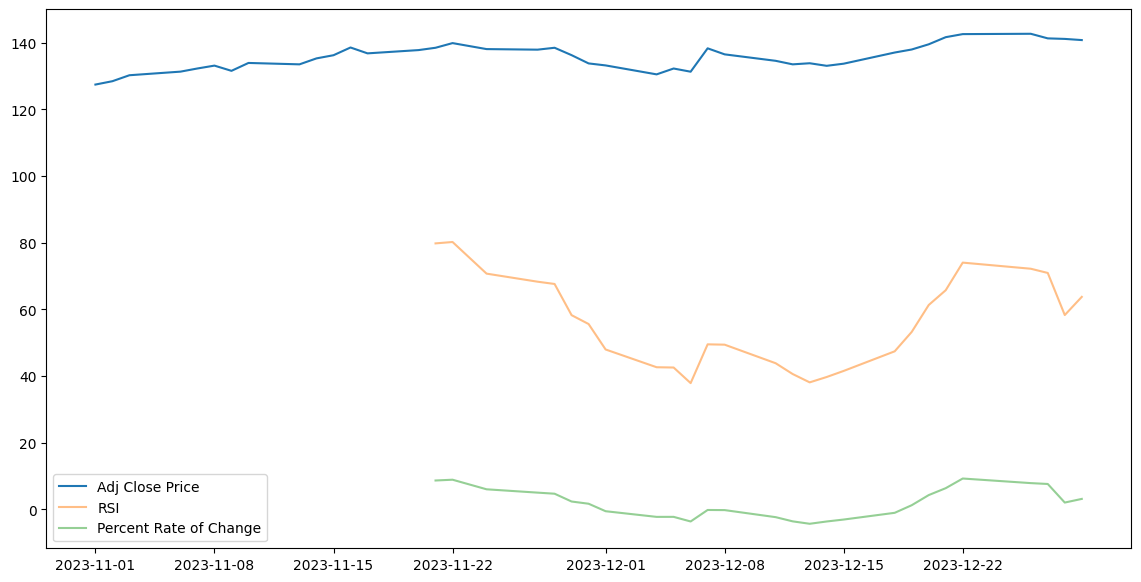

TSLA
0


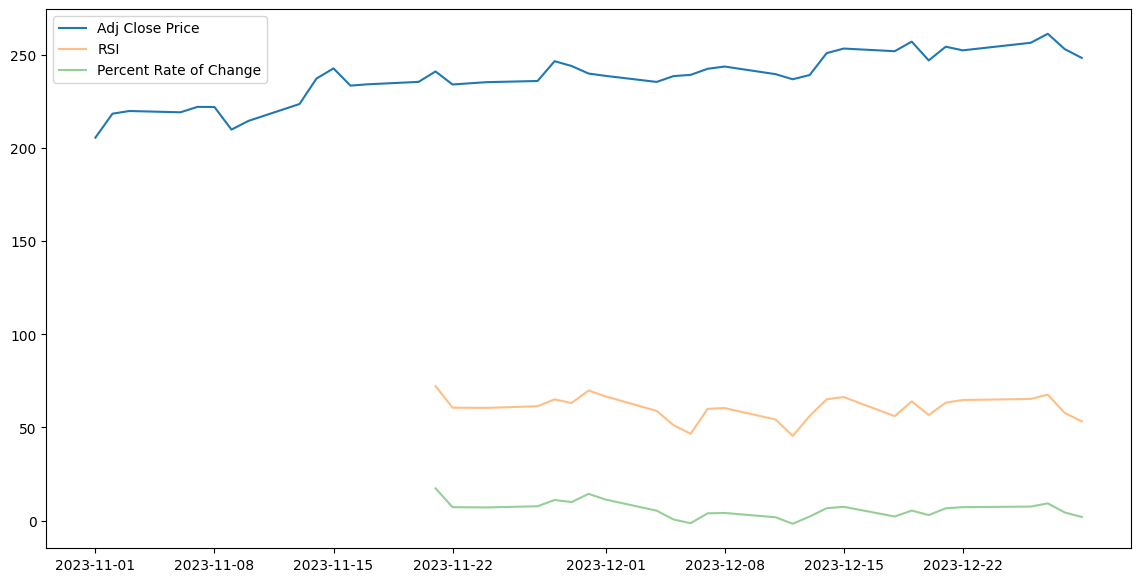

META
-1


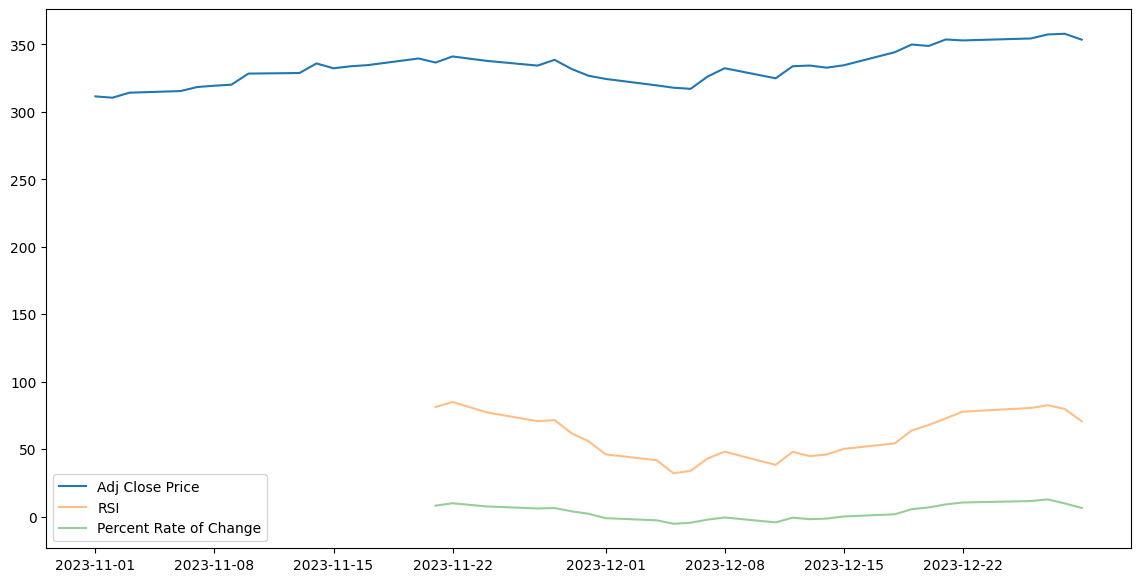

NVDA
0


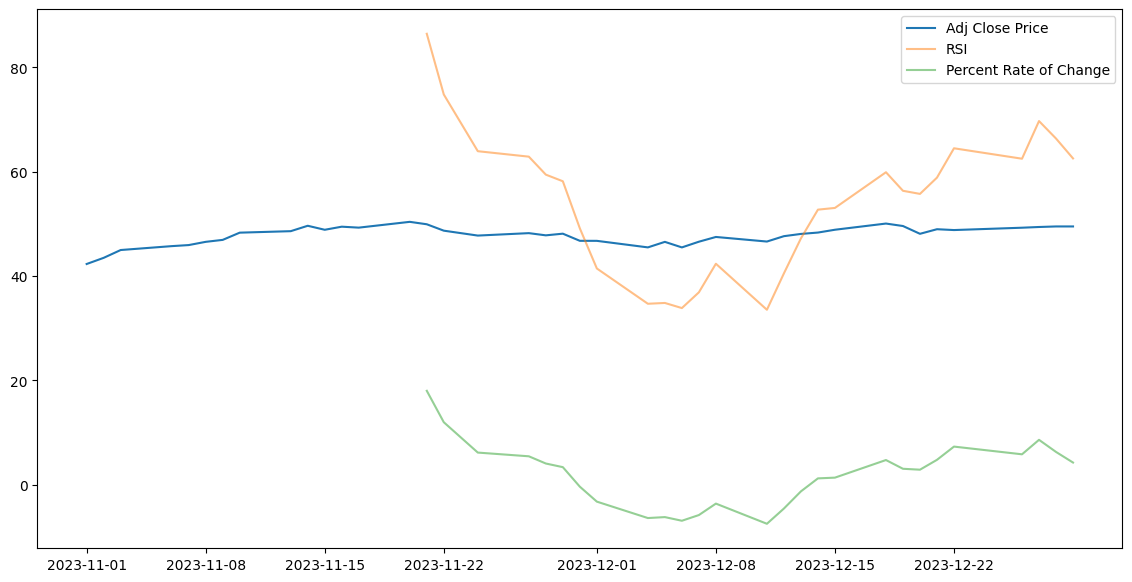

AAPL
0


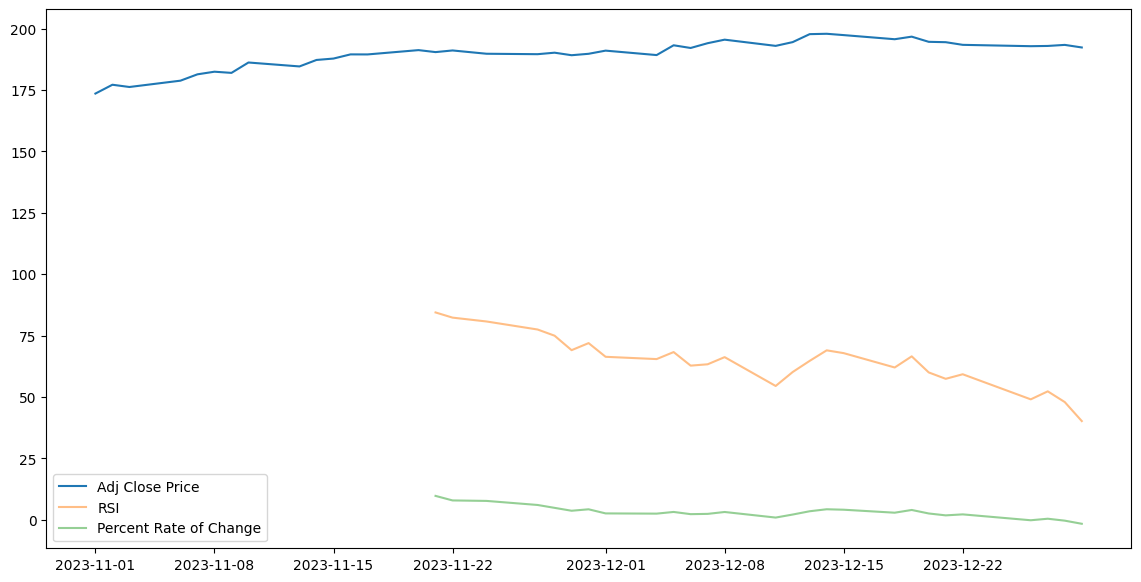

EBAY
0


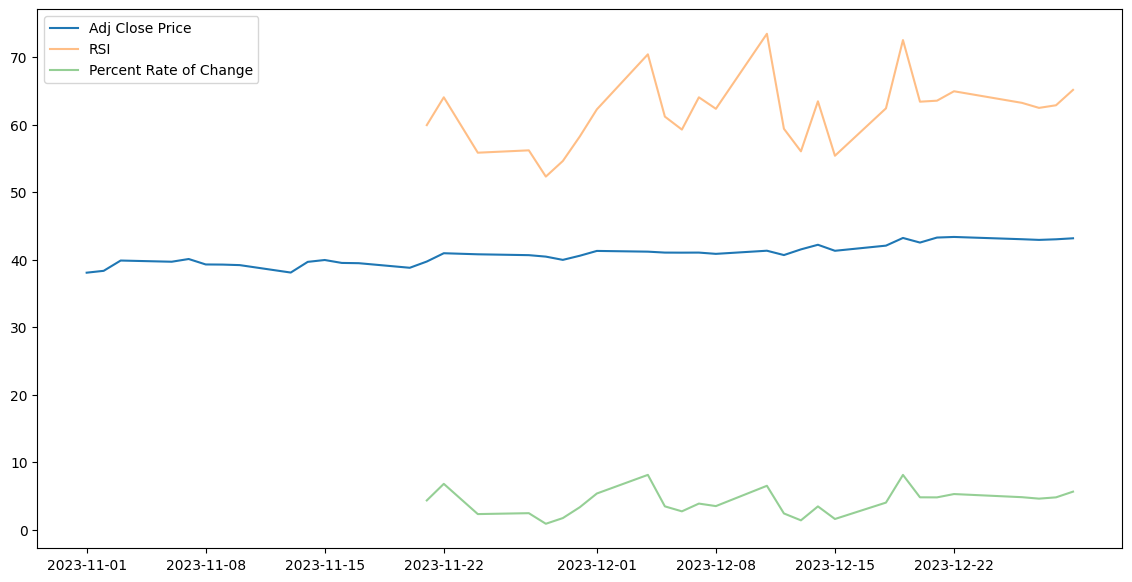

AMZN
0


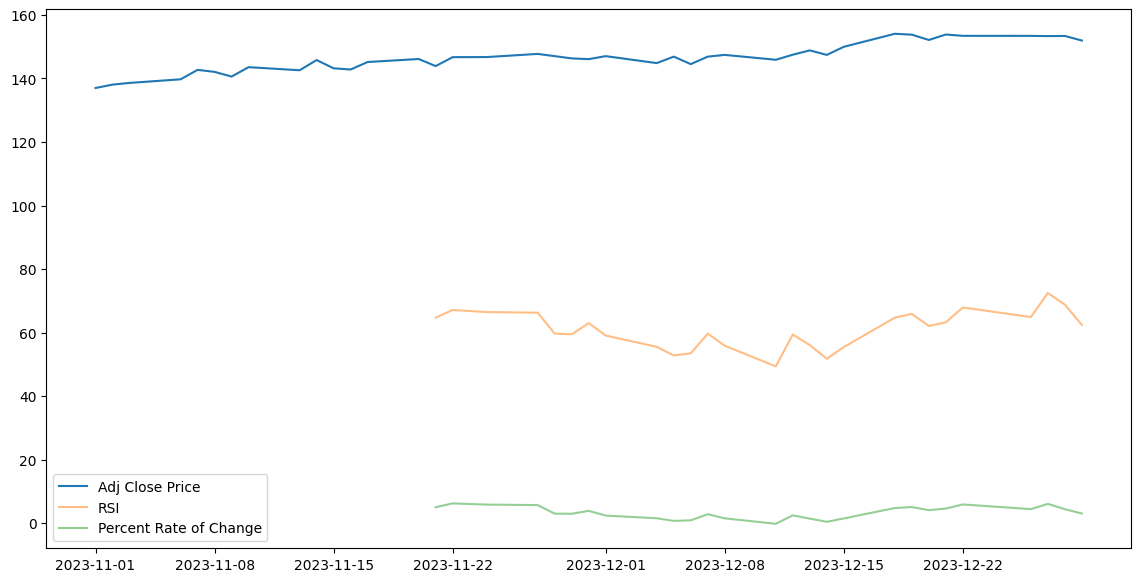

NFLX
0


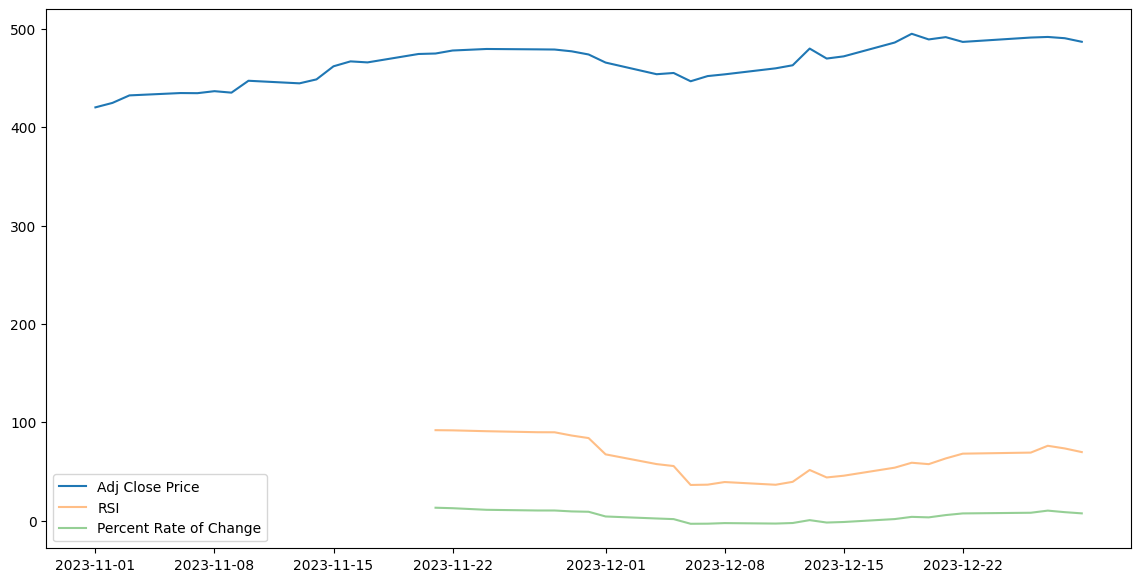

MSFT
0


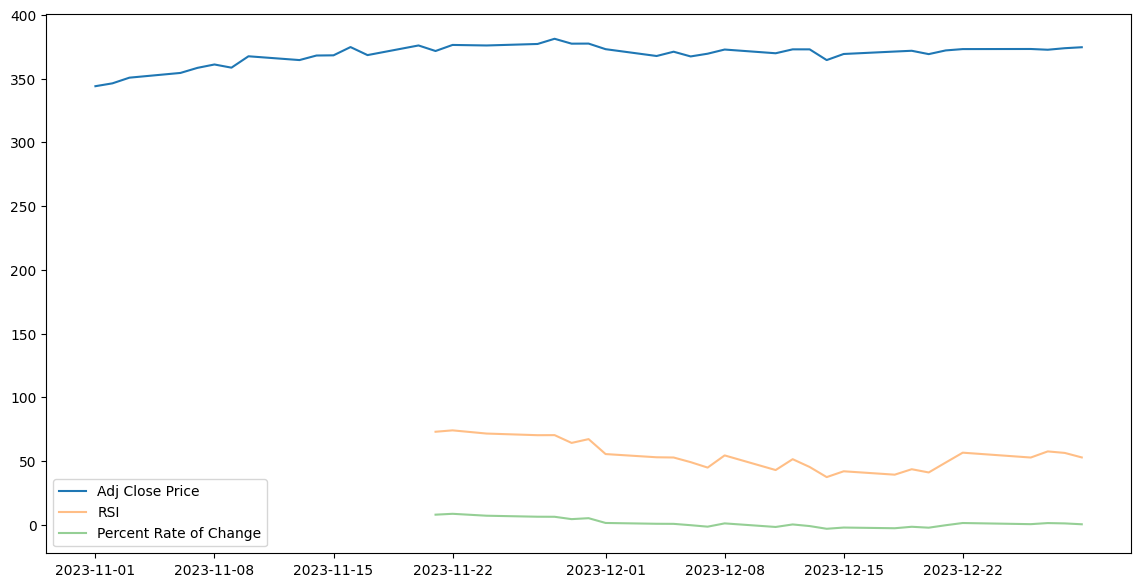

INTC
-1


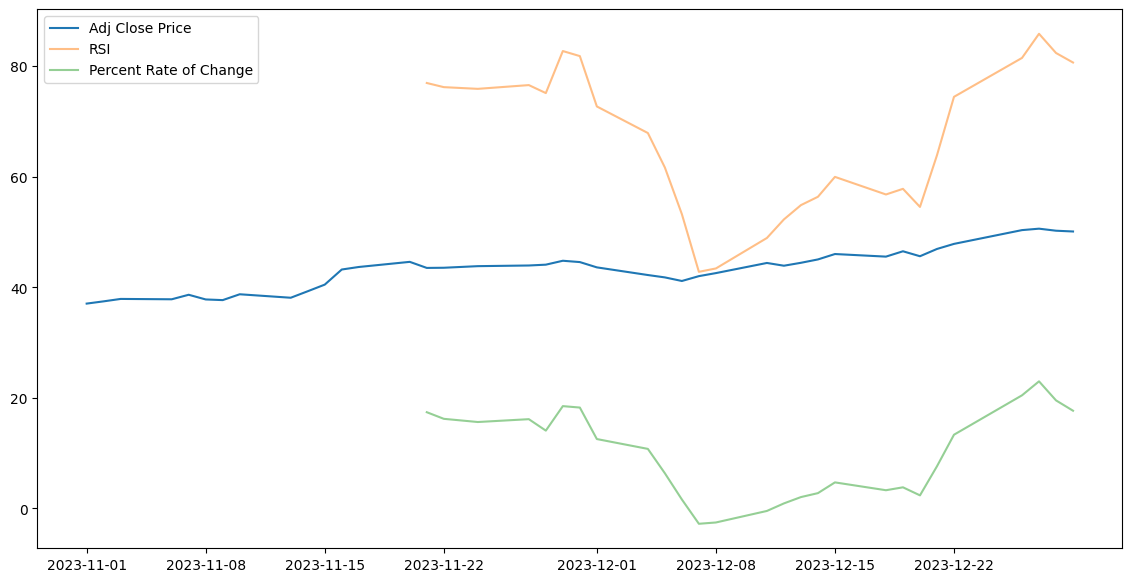

In [6]:
for stock_symbol in tickers:
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock_symbol]['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    plt.plot(roc_values[stock_symbol], label='Percent Rate of Change', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [7]:
# 1 minute intervals over 5 days
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "1m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14) 
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    15.522228
2024-06-13 15:56:00-04:00    17.226169
2024-06-13 15:57:00-04:00    28.194950
2024-06-13 15:58:00-04:00    26.414768
2024-06-13 15:59:00-04:00    23.025880
Name: Adj Close, Length: 1949, dtype: float64
RSI of TSLA: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    26.210077
2024-06-13 15:56:00-04:00    36.803545
2024-06-13 15:57:00-04:00    37.688519
2024-06-13 15:58:00-04:00    41.513759
2024-06-13 15:59:00-04:00    47.359003
Name: Adj Close, Length: 1949, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of META: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    43.654566
2024-06-13 15:56:00-04:00    54.716788
2024-06-13 15:57:00-04:00    52.892072
2024-06-13 15:58:00-04:00    45.333840
2024-06-13 15:59:00-04:00    33.108930
Name: Adj Close, Length: 1949, dtype: float64
RSI of NVDA: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    59.649293
2024-06-13 15:56:00-04:00    67.847261
2024-06-13 15:57:00-04:00    68.995237
2024-06-13 15:58:00-04:00    69.689190
2024-06-13 15:59:00-04:00    54.992564
Name: Adj Close, Length: 1949, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AAPL: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    65.251794
2024-06-13 15:56:00-04:00    69.744872
2024-06-13 15:57:00-04:00    70.609261
2024-06-13 15:58:00-04:00    75.213256
2024-06-13 15:59:00-04:00    52.904893
Name: Adj Close, Length: 1949, dtype: float64
RSI of EBAY: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    53.571785
2024-06-13 15:56:00-04:00    58.974509
2024-06-13 15:57:00-04:00    60.000000
2024-06-13 15:58:00-04:00    70.588829
2024-06-13 15:59:00-04:00    62.500149
Name: Adj Close, Length: 1943, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    58.454348
2024-06-13 15:56:00-04:00    55.555556
2024-06-13 15:57:00-04:00    55.779110
2024-06-13 15:58:00-04:00    50.453353
2024-06-13 15:59:00-04:00    41.699069
Name: Adj Close, Length: 1949, dtype: float64
RSI of NFLX: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    57.871194
2024-06-13 15:56:00-04:00    52.900090
2024-06-13 15:57:00-04:00    49.170512
2024-06-13 15:58:00-04:00    33.538947
2024-06-13 15:59:00-04:00    22.635706
Name: Adj Close, Length: 1884, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of MSFT: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    59.065165
2024-06-13 15:56:00-04:00    66.262475
2024-06-13 15:57:00-04:00    67.682582
2024-06-13 15:58:00-04:00    68.607873
2024-06-13 15:59:00-04:00    43.019616
Name: Adj Close, Length: 1948, dtype: float64
RSI of INTC: Datetime
2024-06-07 09:30:00-04:00          NaN
2024-06-07 09:31:00-04:00          NaN
2024-06-07 09:32:00-04:00          NaN
2024-06-07 09:33:00-04:00          NaN
2024-06-07 09:34:00-04:00          NaN
                               ...    
2024-06-13 15:55:00-04:00    51.396940
2024-06-13 15:56:00-04:00    54.437623
2024-06-13 15:57:00-04:00    58.620803
2024-06-13 15:58:00-04:00    60.044666
2024-06-13 15:59:00-04:00    47.768260
Name: Adj Close, Length: 1949, dtype: float64


GOOG
0


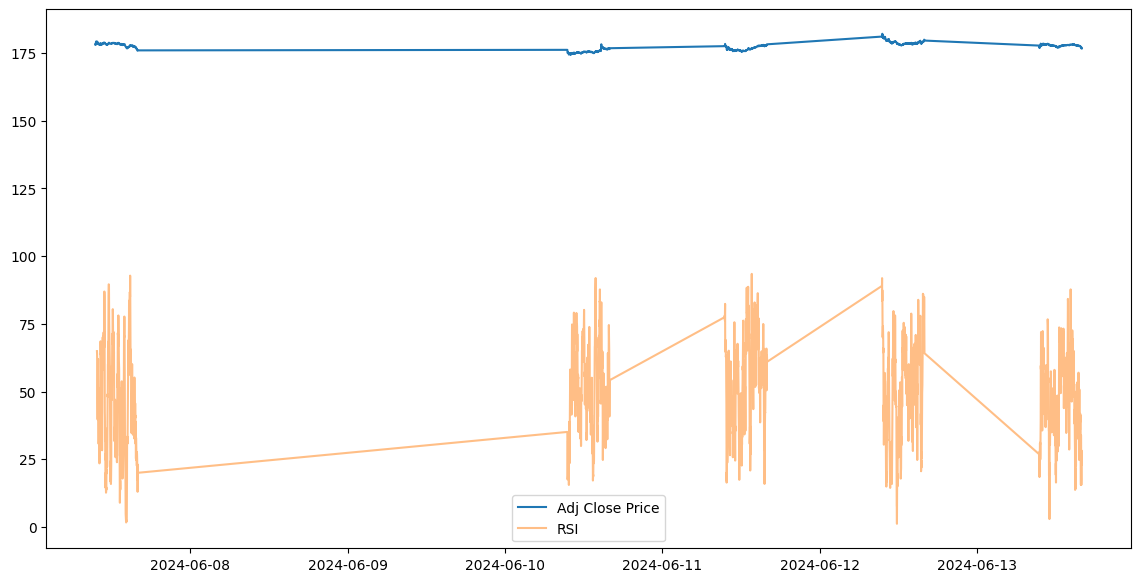

TSLA
0


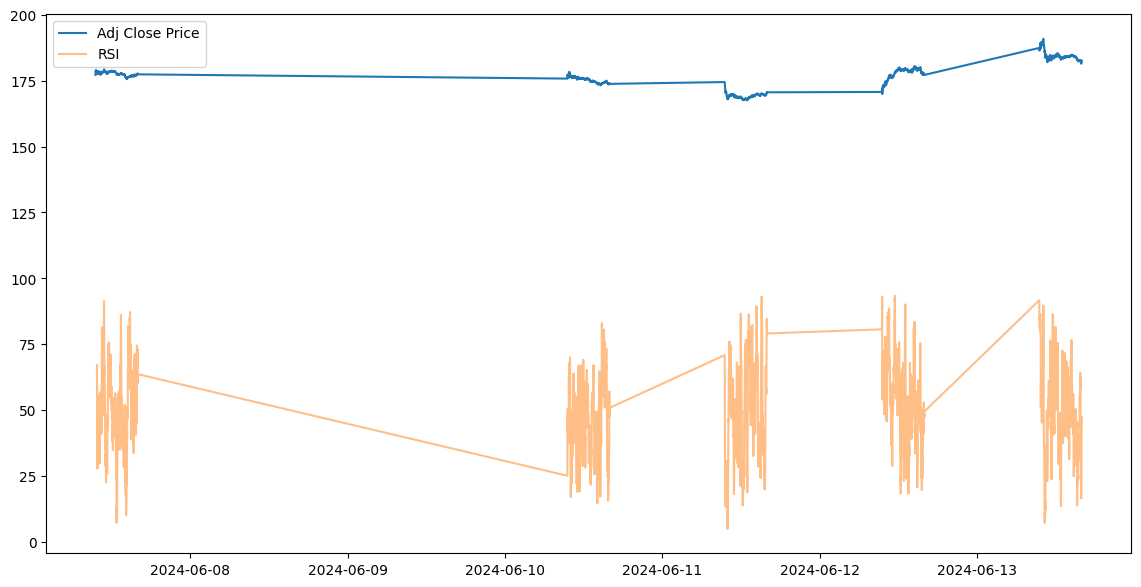

META
-1


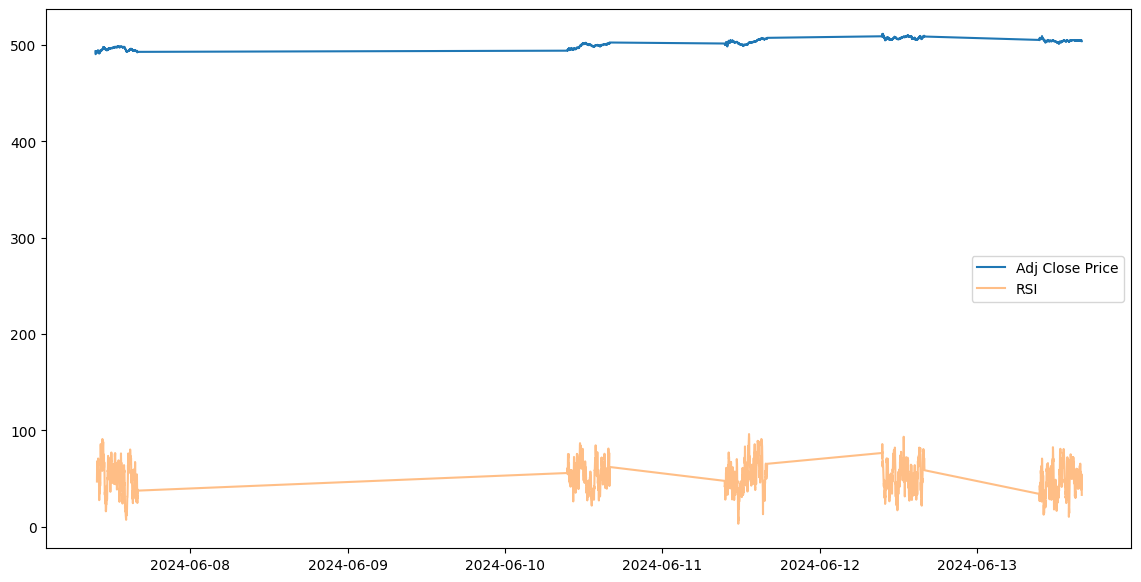

NVDA
0


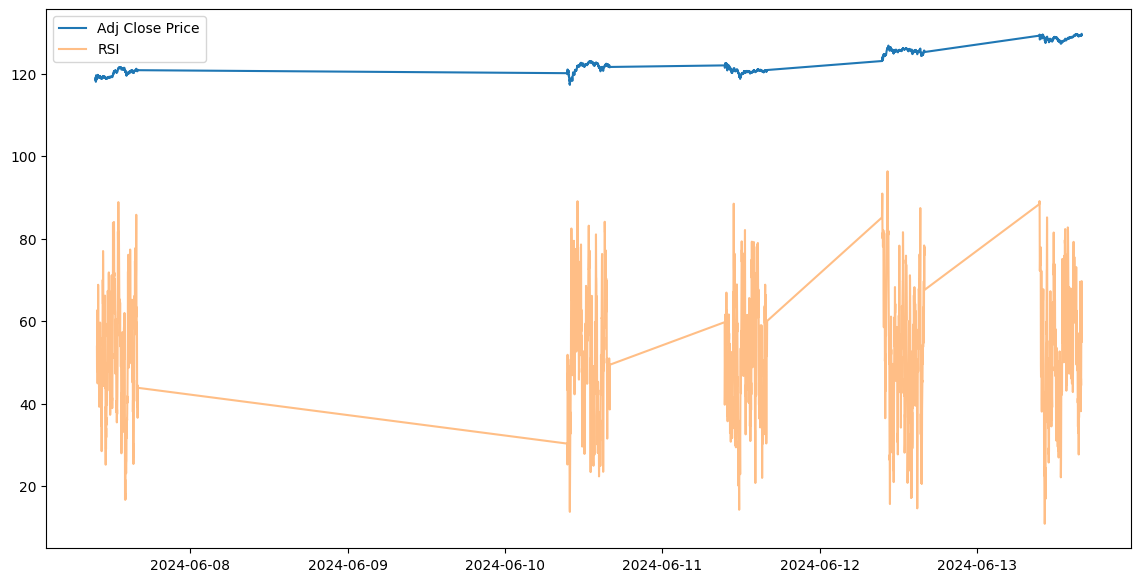

AAPL
0


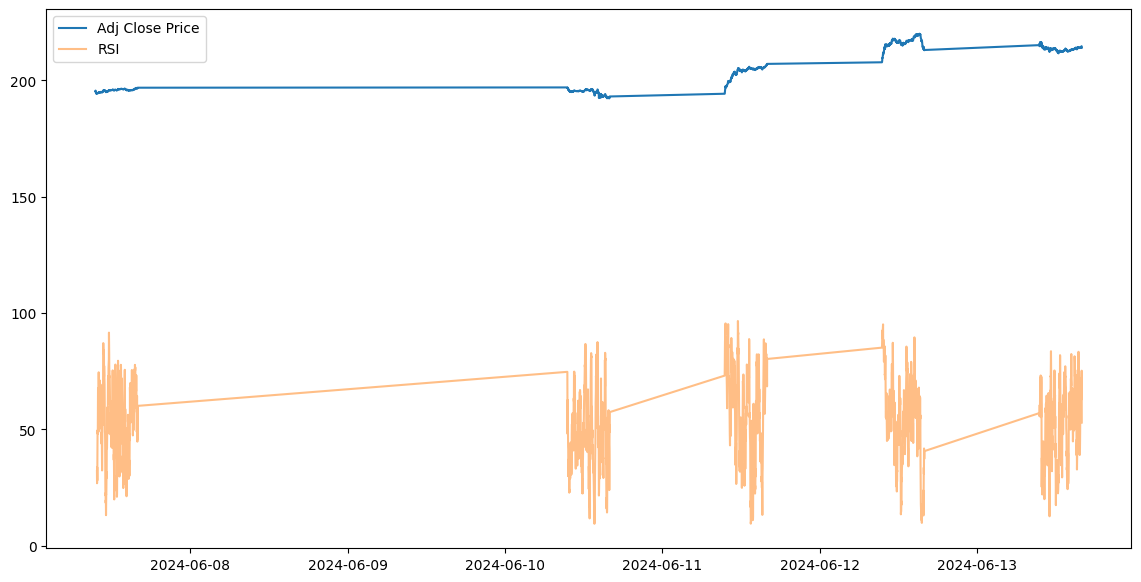

EBAY
0


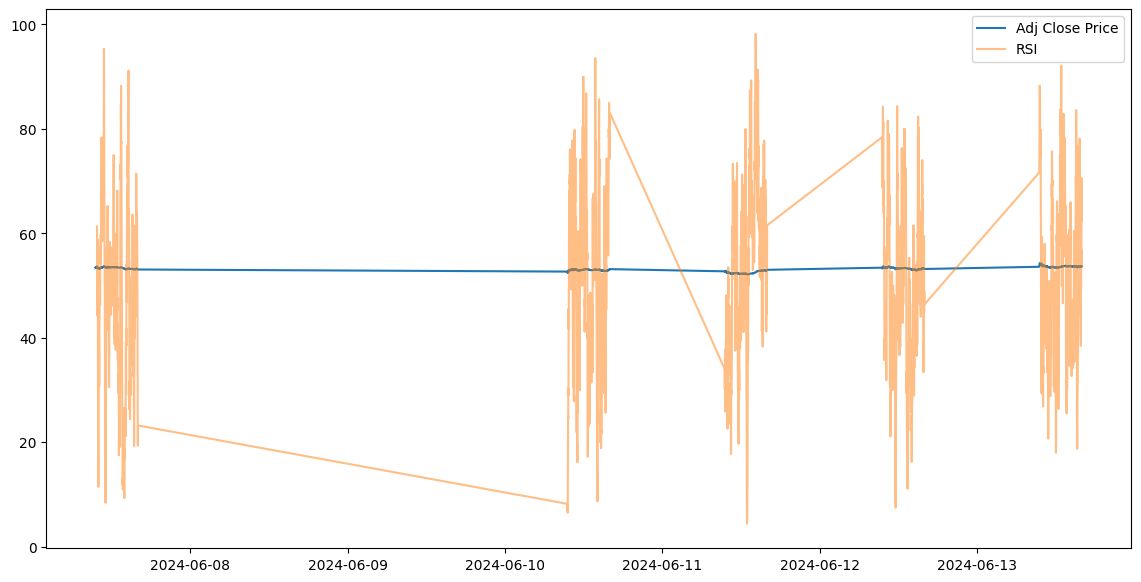

AMZN
0


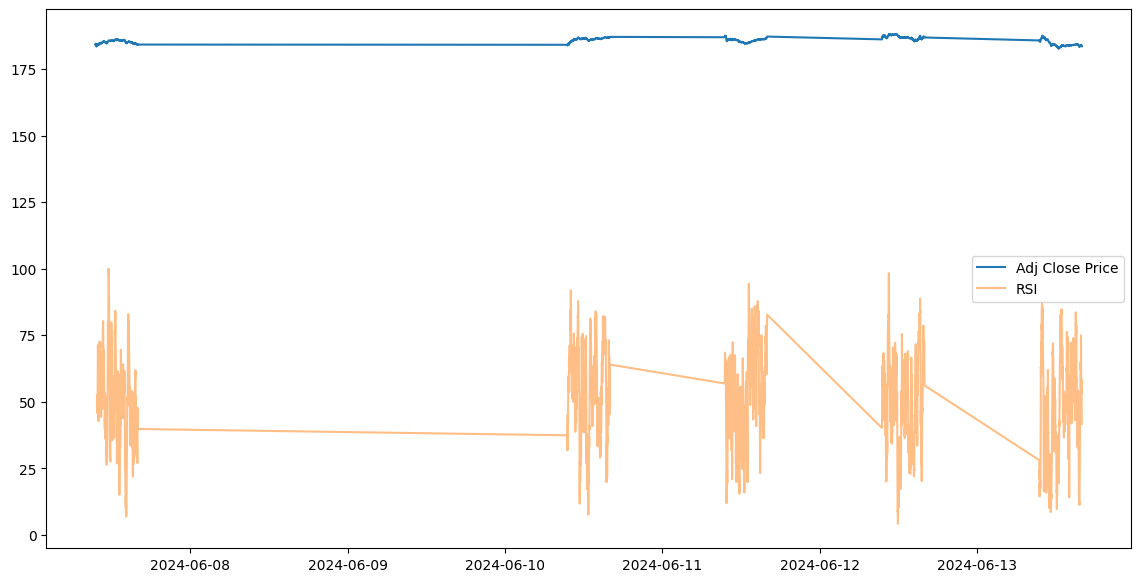

NFLX
0


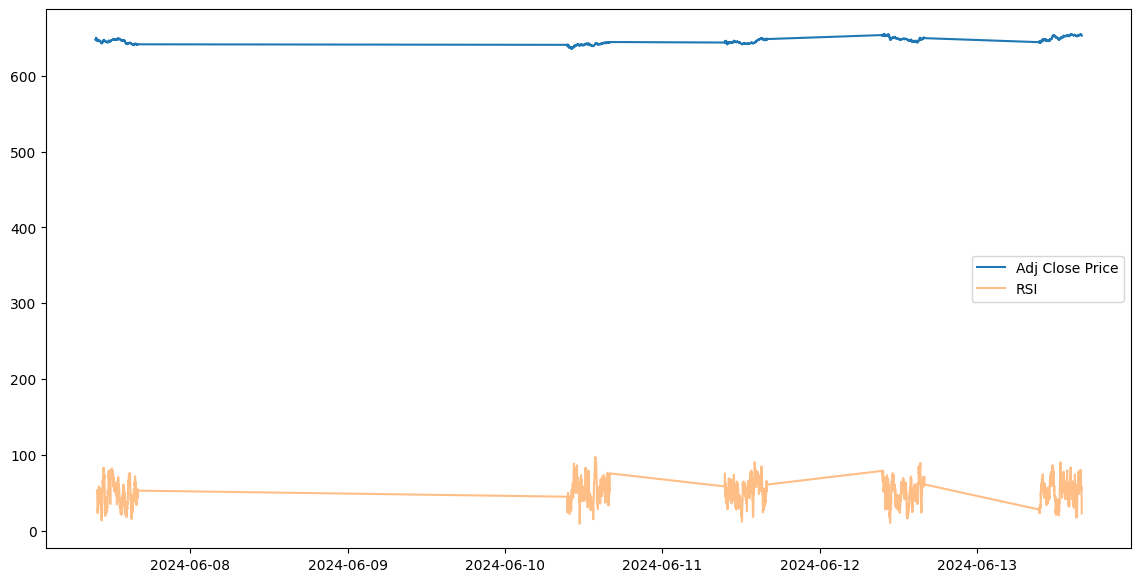

MSFT
0


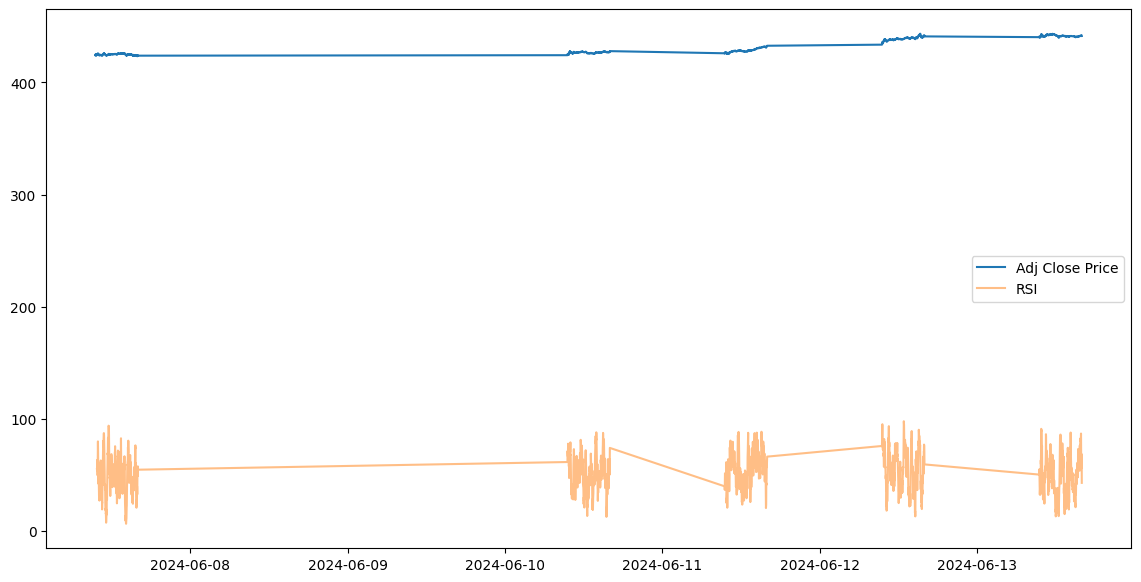

INTC
-1


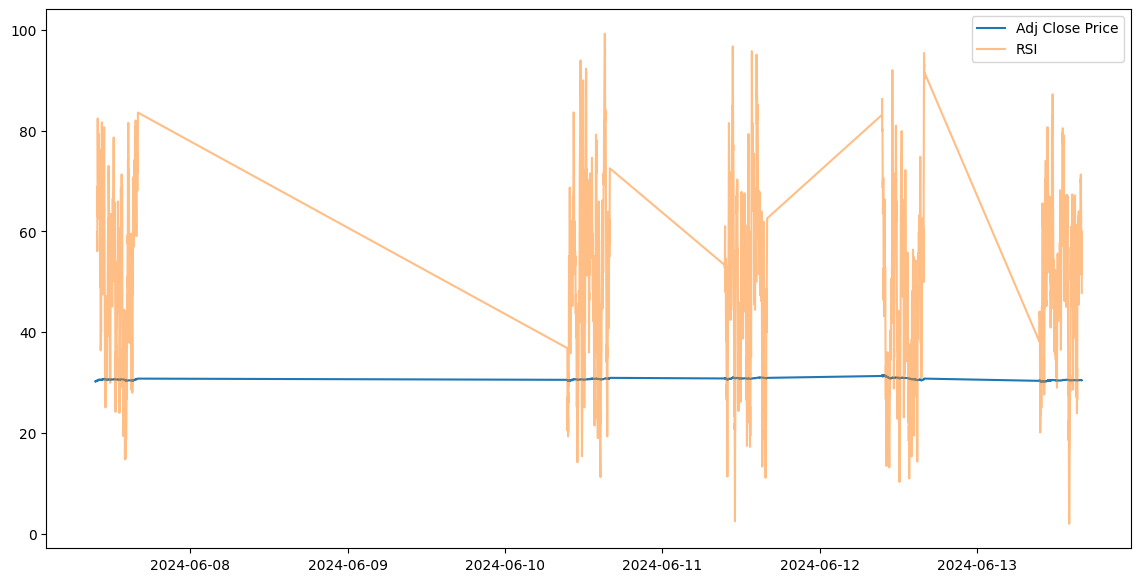

In [8]:
for stock_symbol in tickers:
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock_symbol]['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [9]:
# 60 minute interval over 5 days
for stock_symbol in tickers:
    stock_data[stock_symbol] = yf.download(stock_symbol, period = "5d",  interval = "60m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data[stock_symbol]['Adj Close'], window=14) 
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-07 09:30:00          NaN
2024-06-07 10:30:00          NaN
2024-06-07 11:30:00          NaN
2024-06-07 12:30:00          NaN
2024-06-07 13:30:00          NaN
2024-06-07 14:30:00          NaN
2024-06-07 15:30:00          NaN
2024-06-10 09:30:00          NaN
2024-06-10 10:30:00          NaN
2024-06-10 11:30:00          NaN
2024-06-10 12:30:00          NaN
2024-06-10 13:30:00          NaN
2024-06-10 14:30:00          NaN
2024-06-10 15:30:00          NaN
2024-06-11 09:30:00    37.500076
2024-06-11 10:30:00    34.333356
2024-06-11 11:30:00    32.330347
2024-06-11 12:30:00    39.371966
2024-06-11 13:30:00    52.654849
2024-06-11 14:30:00    52.232174
2024-06-11 15:30:00    66.398131
2024-06-12 09:30:00    82.457241
2024-06-12 10:30:00    74.970148
2024-06-12 11:30:00    63.523000
2024-06-12 12:30:00    67.812451
2024-06-12 13:30:00    65.494074
2024-06-12 14:30:00    62.425324
2024-06-12 15:30:00    65.477453
2024-06-13 09:30:00    58.942769
2024-06-13 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of NVDA: Datetime
2024-06-07 09:30:00          NaN
2024-06-07 10:30:00          NaN
2024-06-07 11:30:00          NaN
2024-06-07 12:30:00          NaN
2024-06-07 13:30:00          NaN
2024-06-07 14:30:00          NaN
2024-06-07 15:30:00          NaN
2024-06-10 09:30:00          NaN
2024-06-10 10:30:00          NaN
2024-06-10 11:30:00          NaN
2024-06-10 12:30:00          NaN
2024-06-10 13:30:00          NaN
2024-06-10 14:30:00          NaN
2024-06-10 15:30:00          NaN
2024-06-11 09:30:00    60.353509
2024-06-11 10:30:00    57.711817
2024-06-11 11:30:00    48.996984
2024-06-11 12:30:00    46.095076
2024-06-11 13:30:00    53.897698
2024-06-11 14:30:00    48.533678
2024-06-11 15:30:00    50.236295
2024-06-12 09:30:00    73.800360
2024-06-12 10:30:00    62.024251
2024-06-12 11:30:00    62.500007
2024-06-12 12:30:00    64.020564
2024-06-12 13:30:00    67.380272
2024-06-12 14:30:00    57.965466
2024-06-12 15:30:00    63.967553
2024-06-13 09:30:00    73.598728
2024-06-13 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Datetime
2024-06-07 09:30:00          NaN
2024-06-07 10:30:00          NaN
2024-06-07 11:30:00          NaN
2024-06-07 12:30:00          NaN
2024-06-07 13:30:00          NaN
2024-06-07 14:30:00          NaN
2024-06-07 15:30:00          NaN
2024-06-10 09:30:00          NaN
2024-06-10 10:30:00          NaN
2024-06-10 11:30:00          NaN
2024-06-10 12:30:00          NaN
2024-06-10 13:30:00          NaN
2024-06-10 14:30:00          NaN
2024-06-10 15:30:00          NaN
2024-06-11 09:30:00    59.912209
2024-06-11 10:30:00    52.194870
2024-06-11 11:30:00    42.270002
2024-06-11 12:30:00    45.864203
2024-06-11 13:30:00    56.210118
2024-06-11 14:30:00    59.584608
2024-06-11 15:30:00    68.816956
2024-06-12 09:30:00    60.972046
2024-06-12 10:30:00    62.581434
2024-06-12 11:30:00    53.514578
2024-06-12 12:30:00    55.304050
2024-06-12 13:30:00    47.868606
2024-06-12 14:30:00    47.778457
2024-06-12 15:30:00    48.725180
2024-06-13 09:30:00    50.058175
2024-06-13 10:30:00  

[*********************100%%**********************]  1 of 1 completed

RSI of INTC: Datetime
2024-06-07 09:30:00          NaN
2024-06-07 10:30:00          NaN
2024-06-07 11:30:00          NaN
2024-06-07 12:30:00          NaN
2024-06-07 13:30:00          NaN
2024-06-07 14:30:00          NaN
2024-06-07 15:30:00          NaN
2024-06-10 09:30:00          NaN
2024-06-10 10:30:00          NaN
2024-06-10 11:30:00          NaN
2024-06-10 12:30:00          NaN
2024-06-10 13:30:00          NaN
2024-06-10 14:30:00          NaN
2024-06-10 15:30:00          NaN
2024-06-11 09:30:00    54.636865
2024-06-11 10:30:00    58.076178
2024-06-11 11:30:00    56.088861
2024-06-11 12:30:00    53.227242
2024-06-11 13:30:00    66.545039
2024-06-11 14:30:00    61.858699
2024-06-11 15:30:00    55.805857
2024-06-12 09:30:00    63.879704
2024-06-12 10:30:00    62.376683
2024-06-12 11:30:00    64.202162
2024-06-12 12:30:00    55.306246
2024-06-12 13:30:00    49.358291
2024-06-12 14:30:00    37.233985
2024-06-12 15:30:00    45.370374
2024-06-13 09:30:00    38.281257
2024-06-13 10:30:00  

GOOG
0


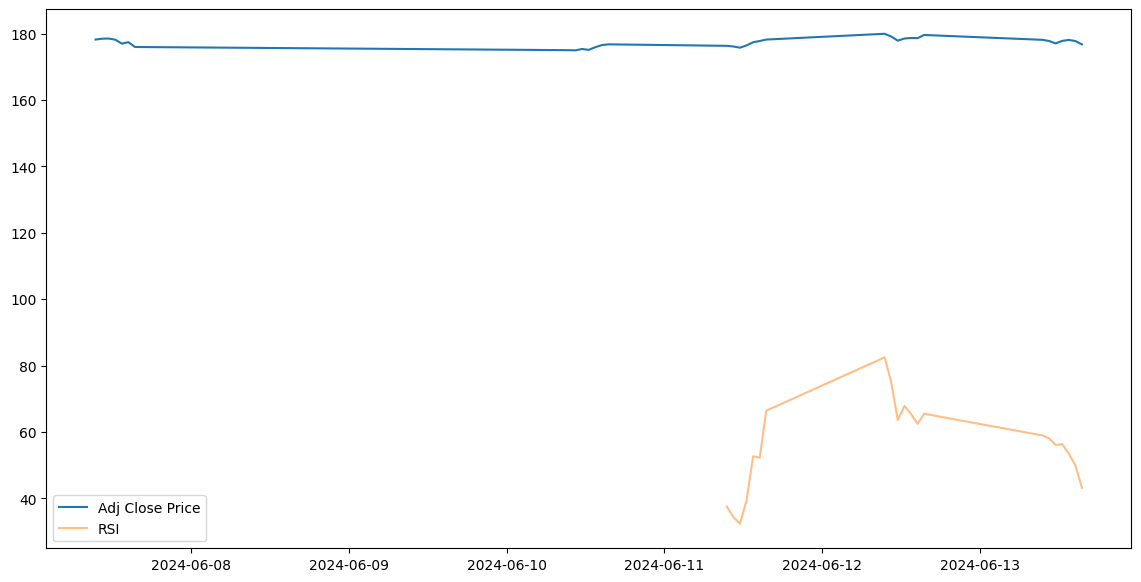

TSLA
0


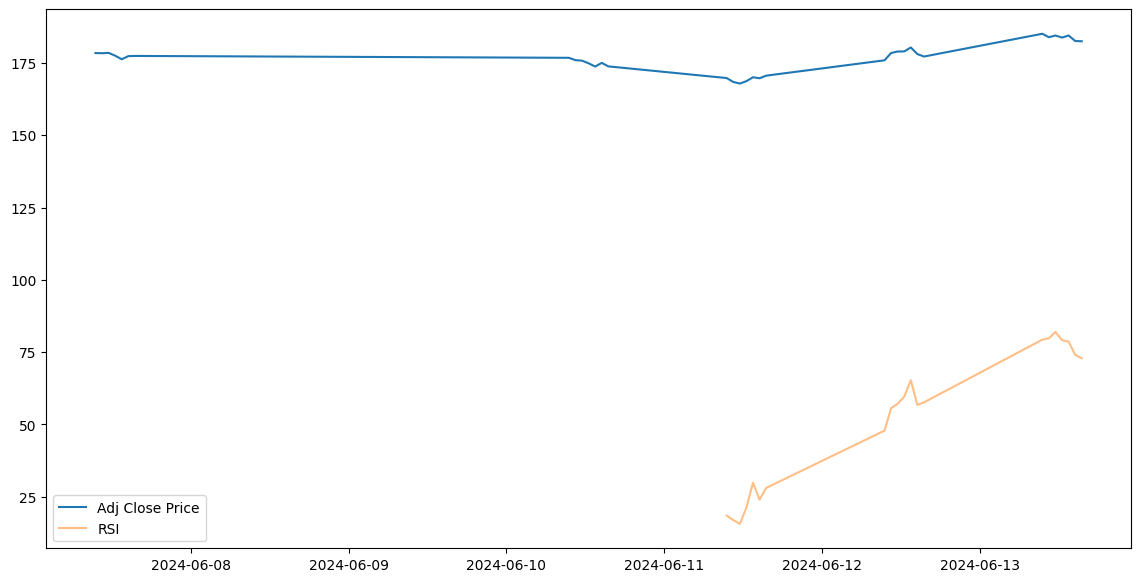

META
-1


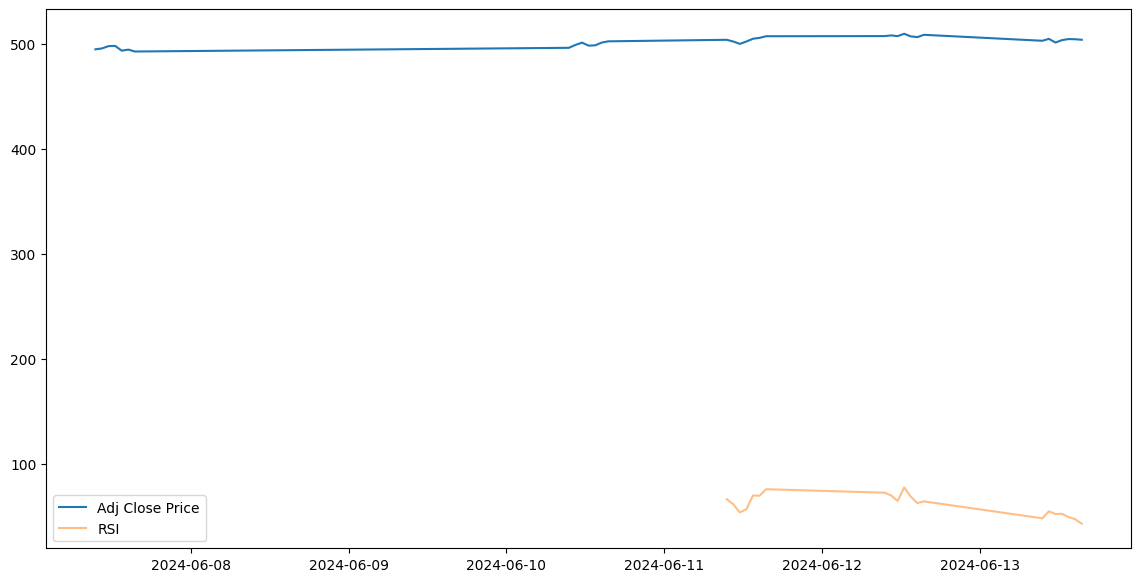

NVDA
0


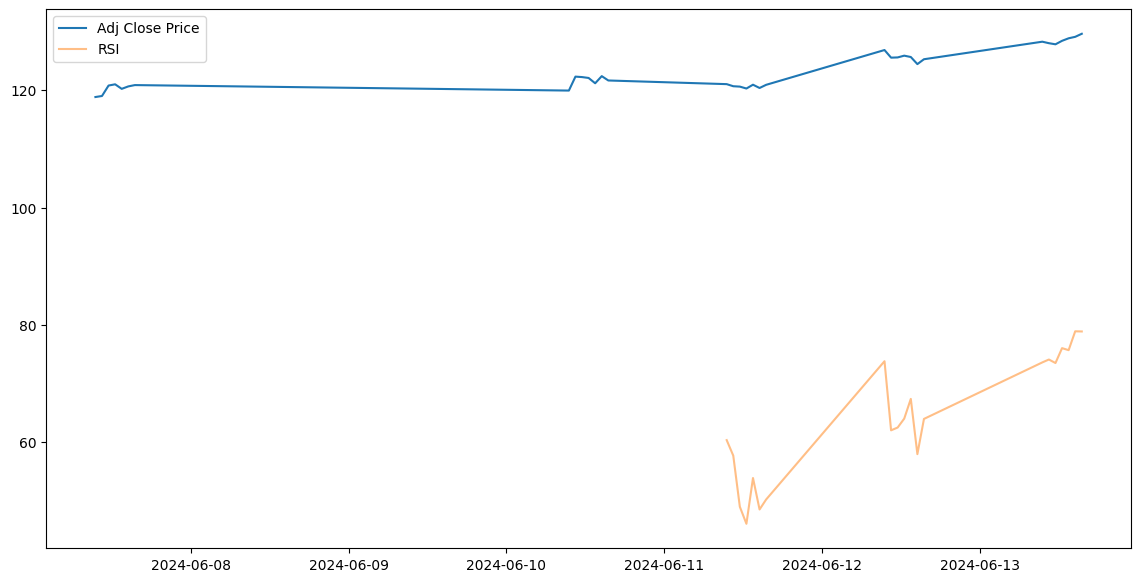

AAPL
0


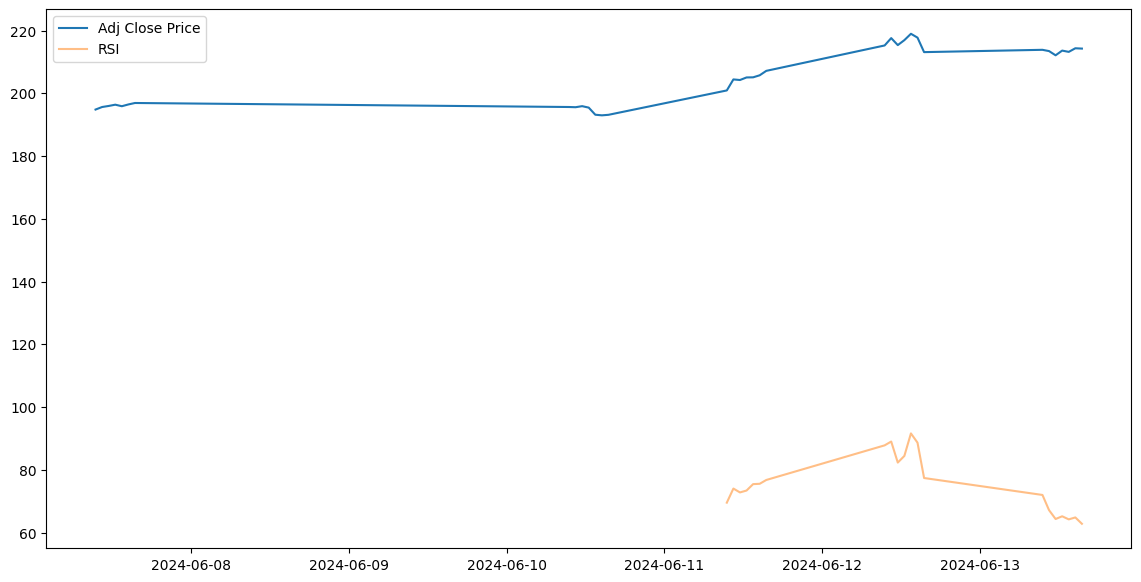

EBAY
0


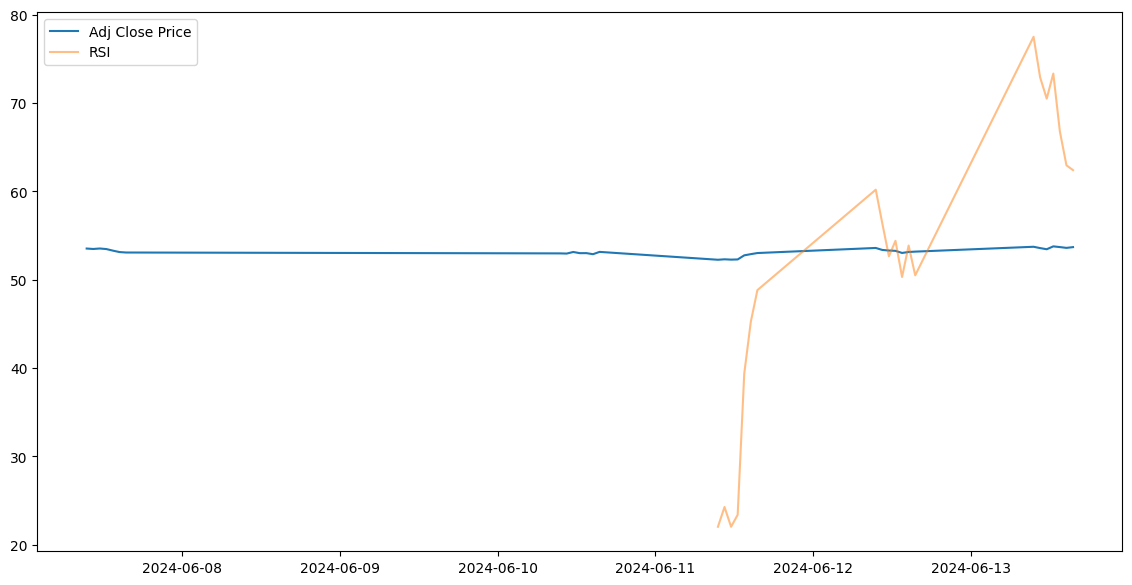

AMZN
0


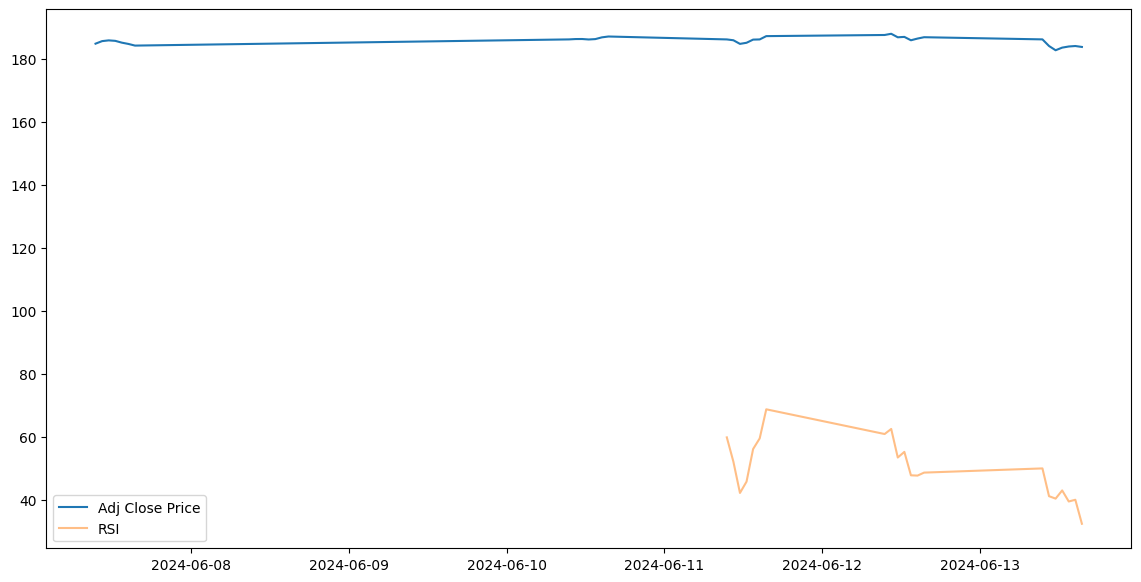

NFLX
0


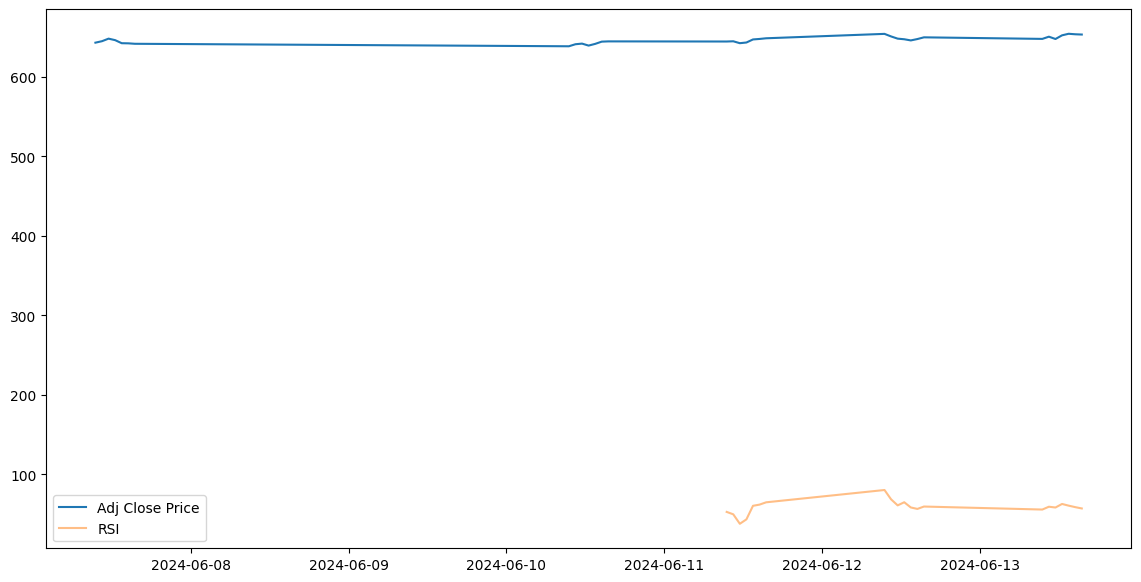

MSFT
0


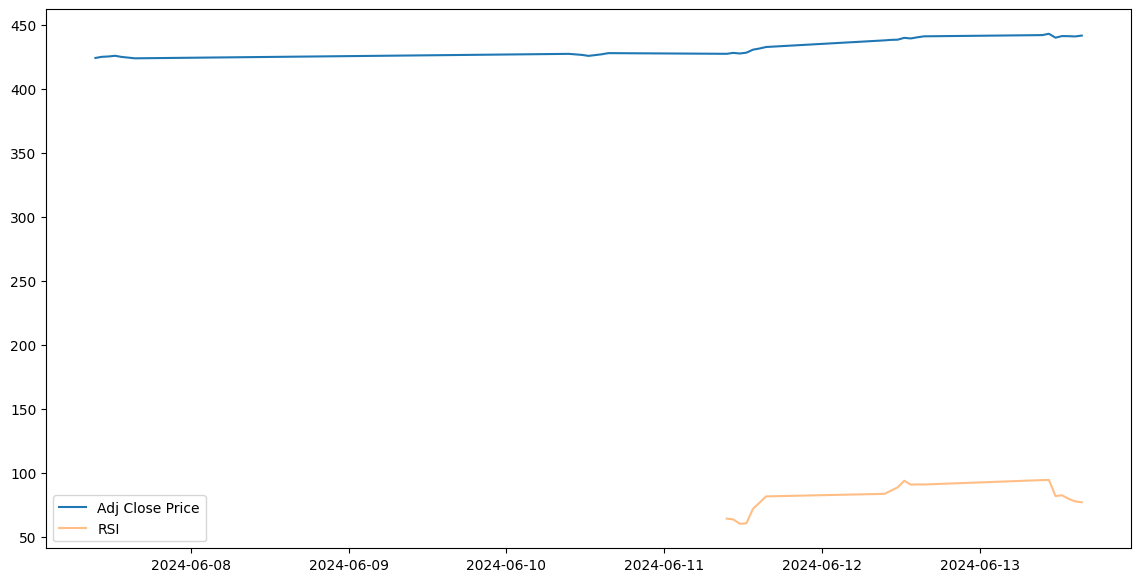

INTC
-1


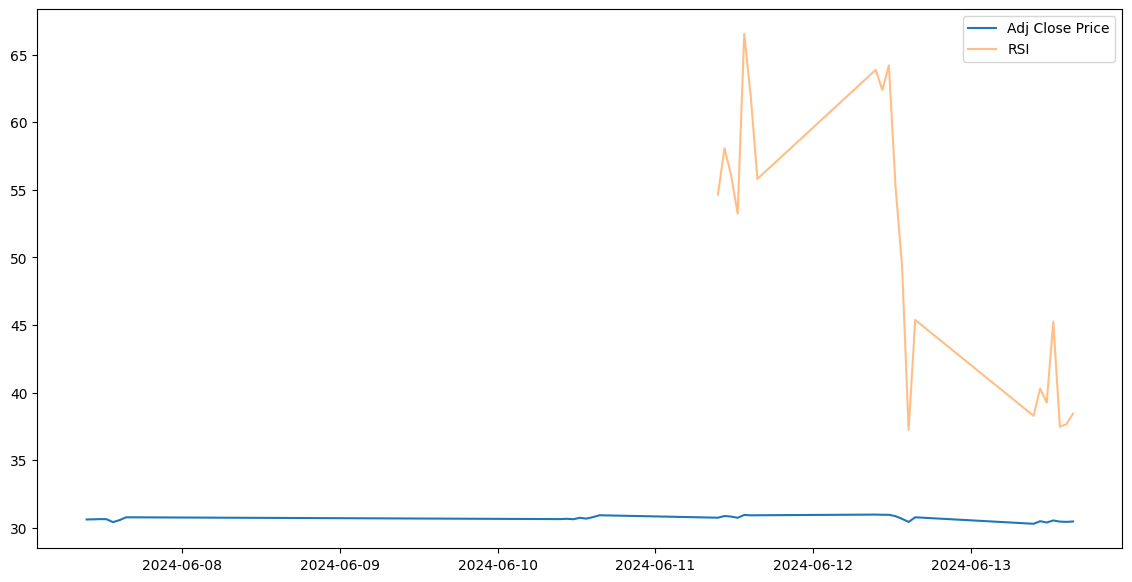

In [10]:
for stock_symbol in tickers:
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock_symbol]['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

Conclusions: For long term investing, such as weekly, there isn't a clear trend. For example when the RSI is in between 30 and 70 you keep the stock, however the stock doesn't stay around the same price as you expect it to and rather increases/decrease. Sometimes it is accurate, when rsi is above 70 you sell and the stock goes down and vice versa but using only RSI is not an accurate way to predict trends. For daily trends there is also not a very consistent predicition based on RSI.